Coefficients: 
 [-0.42498723]
Residual sum of squares: 56.18
Variance score: -1.40
Coefficients: 
 [0.13992373]
Residual sum of squares: 30.56
Variance score: -0.31
Coefficients: 
 [-0.65457086]
Residual sum of squares: 18.56
Variance score: 0.21
Coefficients: 
 [6.18101996]
Residual sum of squares: 38.50
Variance score: -0.65
Coefficients: 
 [-33.50740648]
Residual sum of squares: 31.06
Variance score: -0.33
Coefficients: 
 [9.126359]
Residual sum of squares: 18.73
Variance score: 0.20
Coefficients: 
 [-0.12125016]
Residual sum of squares: 27.00
Variance score: -0.15
Coefficients: 
 [1.04990962]
Residual sum of squares: 29.56
Variance score: -0.26
Coefficients: 
 [-0.42430923]
Residual sum of squares: 67.82
Variance score: -1.90
Coefficients: 
 [-0.02580034]
Residual sum of squares: 27.40
Variance score: -0.17


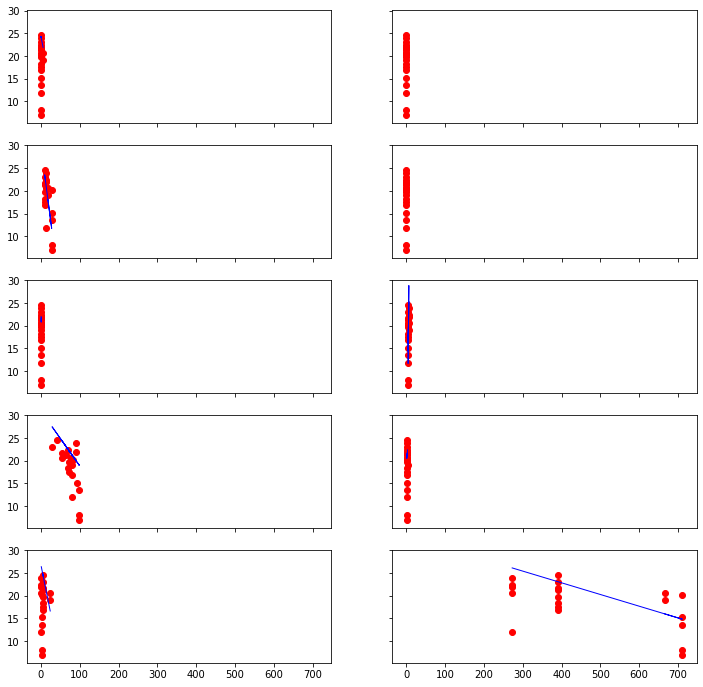

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# załadowanie zbioru danych Boston
boston = datasets.load_boston()
f, axarr = plt.subplots(5,2, sharex=True, sharey=True,figsize=(12,12))
for i in range(0,5):
    for j in range(0,2):
        # Wybranie danych
        boston_X = boston.data[:, np.newaxis, i*2+j]
        
        # Podzielenie danych na zbiory treningowe / testowe
        boston_X_train = boston_X[:-20]
        boston_X_test = boston_X[-20:]
        
        # Podzielenie celów na zestawy treningowe / testowe
        boston_y_train = boston.target[:-20]
        boston_y_test = boston.target[-20:]
        
        # Stworzenie obiektu regresji liniowej 
        regr = linear_model.LinearRegression()
        
        # Nauczanie na zbiorze treningowym
        regr.fit(boston_X_train, boston_y_train)
        
        # Wyświetlenie współczynników
        print('Coefficients: \n', regr.coef_)
        # Błąd
        print("Residual sum of squares: %.2f"
              % np.mean((regr.predict(boston_X_test) - boston_y_test) ** 2))
        # Wynik wariancji 
        print('Variance score: %.2f' % regr.score(boston_X_test, boston_y_test))
        
        # Wykres
        axarr[i,j].scatter(boston_X_test, boston_y_test,  color='red')
        axarr[i,j].plot(boston_X_test, regr.predict(boston_X_test), color='blue', linewidth=1)
        
plt.show()

In [5]:
#Porównanie modeli regresji liniowej
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm

# Załadowanie zbioru diabets
diabetes  = datasets.load_diabetes ()
# Pobranie danych X i Y
diabetes_X = diabetes.data
diabetes_Y = diabetes.target
# Podzielenie danych na zbiory treningowe i testowe
diabetes_X_train = diabetes_X[:-50]
diabetes_X_test = diabetes_X[-50:]
# Podzielenie celów na zestawy szkoleniowe / testowe
diabetes_y_train = diabetes_Y[:-50]
diabetes_y_test = diabetes_Y[-50:]

regressors = {}
regressors['LinReg'] =linm.LinearRegression()
regressors['Ridge'] = linm.Ridge(alpha = .5)
regressors['Lasso'] = linm.Lasso(alpha = 5.1)
regressors['ElNet'] =linm.ElasticNet(alpha = .5, l1_ratio=0.5)
fit_results={}
for key in regressors:
    # Nauczanie na zbiorze treningowym
    regr = regressors[key]
    regr.fit(diabetes_X_train, diabetes_y_train)
    # Wyliczenie błędu
    mse = np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)
    w = regr.coef_
    # l1 norm
    wl1 = np.sum(np.abs(w))
    # l2 norm
    wl2 = np.sqrt(np.sum(w**2))
    fit_results[key]= { 'mse': mse, 'wl2': wl2, 'wl1': wl1, 'w': w}
    print("{}\n----------\n  mse={}\n  wl1={}\n  wl2={}\n  w={}\n ".format(key,mse,wl1,wl2,w))

LinReg
----------
  mse=1789.5698810318188
  wl1=3260.7037691826517
  wl2=1274.1717569251268
  w=[   1.19680495 -233.50366519  519.88450429  304.48097981 -726.44619916
  415.80697199   83.01061117  203.1648289   667.92936385  105.27983988]
 
Ridge
----------
  mse=2384.1858647392596
  wl1=1511.08233400137
  wl2=589.1449165292607
  w=[  23.62740295 -119.32265523  362.44657362  222.30799722  -11.56467397
  -45.46192157 -169.43933329  129.82831679  292.72970213  134.35375724]
 
Lasso
----------
  mse=5912.974117294878
  wl1=0.0
  wl2=0.0
  w=[ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
 
ElNet
----------
  mse=5781.123148775016
  wl1=39.063433331886635
  wl2=14.336395063161204
  w=[ 1.48801264  0.          7.23427291  4.94114391  2.19772301  1.7139797
 -4.52179996  5.31415092  6.88097675  4.77137353]
 


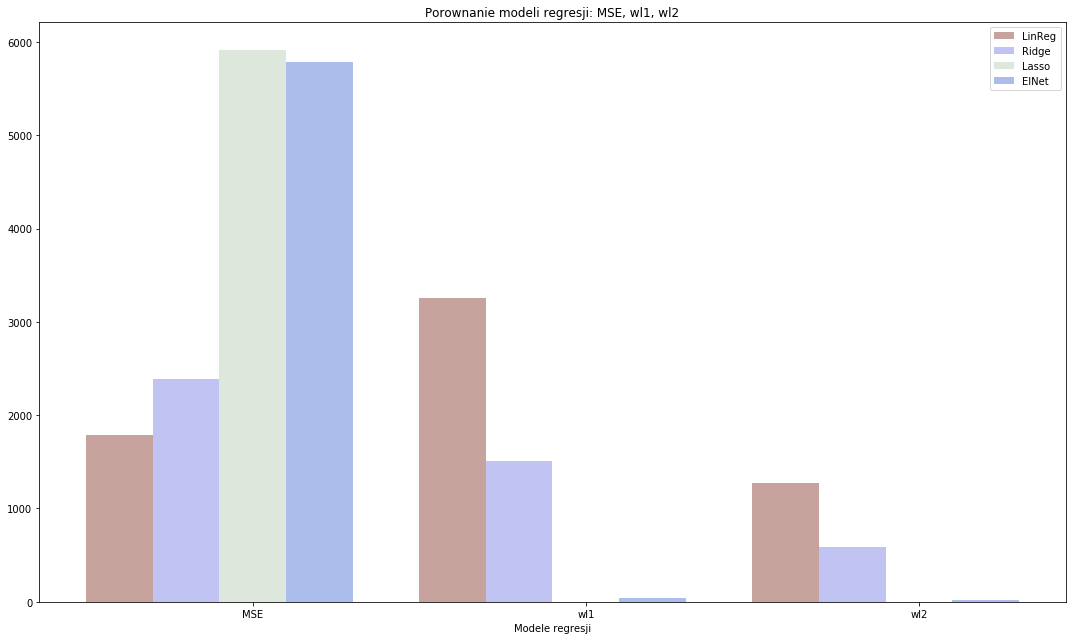

In [6]:
groups = 3
index = np.arange(groups)
bar_width = .2
opacity = 0.4
fig, ax = plt.subplots(figsize=(15,9))
t=0
for key in regressors:
    results = fit_results[key]
    res_val = (results['mse'],results['wl1'],results['wl2'])
    plt.bar(index+ bar_width*t, res_val, bar_width,
                 alpha=opacity,
                 color=np.random.rand(1,3),
                 label=key)
    t+=1
plt.xlabel('Modele regresji')
plt.title('Porownanie modeli regresji: MSE, wl1, wl2')
plt.xticks(index + (t-2)*bar_width, ('MSE', 'wl1', 'wl2'))
plt.legend()
plt.tight_layout()
plt.show()

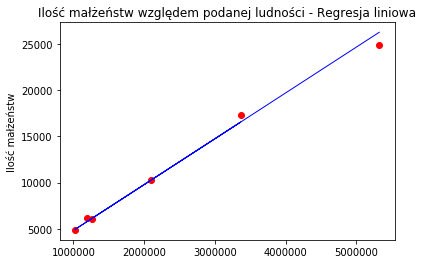

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

malzenstwa = pd.read_csv('lab5_malzenstwa.csv', sep=';', encoding='iso-8859-1')
ludnosc = malzenstwa.ludnosc
malzenstwa_count = malzenstwa.malzenstwa

X_train, X_test, Y_train, Y_test = train_test_split(ludnosc, malzenstwa_count, test_size=0.33)

regr = linear_model.LinearRegression()

regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))

plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Ilość małżeństw względem podanej ludności - Regresja liniowa')
plt.ylabel('Ilość małżeństw')
plt.show()

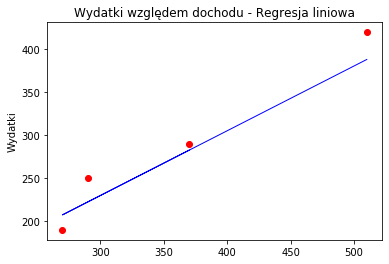

In [15]:
wydatki_df = pd.read_csv('lab5_wydatki.csv', sep=',', encoding='iso-8859-1')
dochody = wydatki_df.Dochody
wydatki = wydatki_df.Wydatki

X_train, X_test, Y_train, Y_test = train_test_split(dochody, wydatki, test_size=0.33)

regr = linear_model.LinearRegression()

regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))
        
plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Wydatki względem dochodu - Regresja liniowa')
plt.ylabel('Wydatki')
plt.show()

In [23]:
random_array = np.random.uniform(0,1, size=(2, 100))

avgX = random_array[0,:].mean()
avgY = random_array[1,:].mean()

print("Średnie X: ")
print(avgX)
print("Średnie Y: ")
print(avgY)

Średnie X: 
0.5114764339961188
Średnie Y: 
0.4750152602985813


In [29]:
# Odjęcie od X wartości średniej
deltaX = np.array([x - avgX for x in random_array[0,:]])
# Odjęcie od Y wartości średniej
deltaY = np.array([y - avgY for y in random_array[1,:]])

# deltaX^2
deltaX2 = np.square(deltaX)
# deltaY^2
deltaY2 = np.square(deltaY)

deltaX2deltaY2 = deltaX2 * deltaY2

result_df = pd.DataFrame(data = {'x' : random_array[0,:], 'y' : random_array[1, :], 'deltaX': deltaX, 
                                 'deltaY': deltaY, 'deltaX^2': deltaX2,'deltaY^2': deltaY2,
                                  'deltaX2 * deltaY2' : deltaX2deltaY2})

result_df

,x,y,deltaX,deltaY,deltaX^2,deltaY^2,deltaX2 * deltaY2
0,0.157512,0.271307,-0.353964,-0.203708,0.125291,0.041497,0.005199
1,0.320450,0.048047,-0.191026,-0.426968,0.036491,0.182302,0.006652
2,0.725565,0.579702,0.214089,0.104687,0.045834,0.010959,0.000502
3,0.020798,0.099272,-0.490678,-0.375743,0.240765,0.141183,0.033992
4,0.781805,0.481671,0.270329,0.006655,0.073078,0.000044,0.000003
...,...,...,...,...,...,...,...
95,0.892801,0.705721,0.381324,0.230706,0.145408,0.053225,0.007739
96,0.899861,0.337589,0.388385,-0.137426,0.150843,0.018886,0.002849
97,0.951883,0.935979,0.440407,0.460963,0.193958,0.212487,0.041214
98,0.158723,0.396853,-0.352754,-0.078162,0.124435,0.006109,0.000760


In [31]:
a = result_df['deltaX2 * deltaY2'].sum() / result_df['deltaX^2'].sum()
print("współczynnik a: ")
print(a)

współczynnik a: 
0.08849073619348138


In [32]:
b = avgY - a * avgX
print("współczynnik b: ")
print(b)

współczynnik b: 
0.42975433410864816


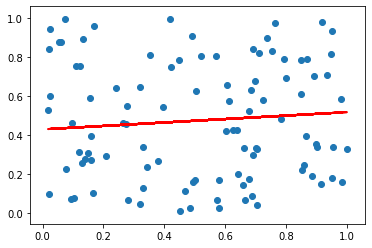

In [34]:
plt.scatter(random_array[0,:], random_array[1,:])
plt.plot(random_array[0,:], a * random_array[0,:] + b, color='red', linewidth = 2)
plt.show()